**Importing essential libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

**Loading dataset**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DAV/Suicides in India 2001-2012.csv")

In [ ]:
df.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


**Dropping rows with null values**

In [ ]:
df.dropna(subset=["Year","Type_code","Type","Gender","Age_group"],inplace=True)

In [ ]:
df.Type_code.unique()

array(['Causes', 'Education_Status', 'Means_adopted',
       'Professional_Profile', 'Social_Status'], dtype=object)

**Arranging data**

In [ ]:
causesDf = df[df["Type_code"]=='Causes']
eduDf = df[df["Type_code"]=="Education_Status"]
meansDf = df[df["Type_code"]=="Means_adopted"]
profDf = df[df["Type_code"]=="Professional_Profile"]
socialDf = df[df["Type_code"]=="Social_Status"]

**Causes of Suicide Case**

In [ ]:
causesDf.Type.unique()

array(['Illness (Aids/STD)', 'Bankruptcy or Sudden change in Economic',
       'Cancellation/Non-Settlement of Marriage',
       'Physical Abuse (Rape/Incest Etc.)', 'Dowry Dispute',
       'Family Problems', 'Ideological Causes/Hero Worshipping',
       'Other Prolonged Illness', 'Property Dispute',
       'Fall in Social Reputation', 'Illegitimate Pregnancy',
       'Failure in Examination', 'Insanity/Mental Illness',
       'Love Affairs', 'Professional/Career Problem', 'Divorce',
       'Drug Abuse/Addiction', 'Not having Children(Barrenness/Impotency',
       'Causes Not known', 'Unemployment',
       'Other Causes (Please Specity)', 'Poverty', 'Death of Dear Person',
       'Cancer', 'Suspected/Illicit Relation', 'Paralysis',
       'Bankruptcy or Sudden change in Economic Status',
       'Not having Children (Barrenness/Impotency'], dtype=object)

We see there are lot of redundant causes such as 'Bankruptcy or Sudden change in Economic'and 'Bankruptcy or Sudden change in Economic Status' etc. So, we need to combine these redundant values:

In [ ]:
# Creating a duplicate copy
causesDf = causesDf.copy()

In [ ]:
causesDf.loc[causesDf['Type']=='Bankruptcy or Sudden change in Economic','Type'] = 'Change in Economic Status'
causesDf.loc[causesDf['Type']=='Bankruptcy or Sudden change in Economic Status','Type'] = 'Change in Economic Status'
causesDf.loc[causesDf['Type']=='Other Causes (Please Specity)','Type'] = 'Causes Not known'
causesDf.loc[causesDf['Type']=='Not having Children (Barrenness/Impotency','Type'] = 'Not having Children(Barrenness/Impotency'

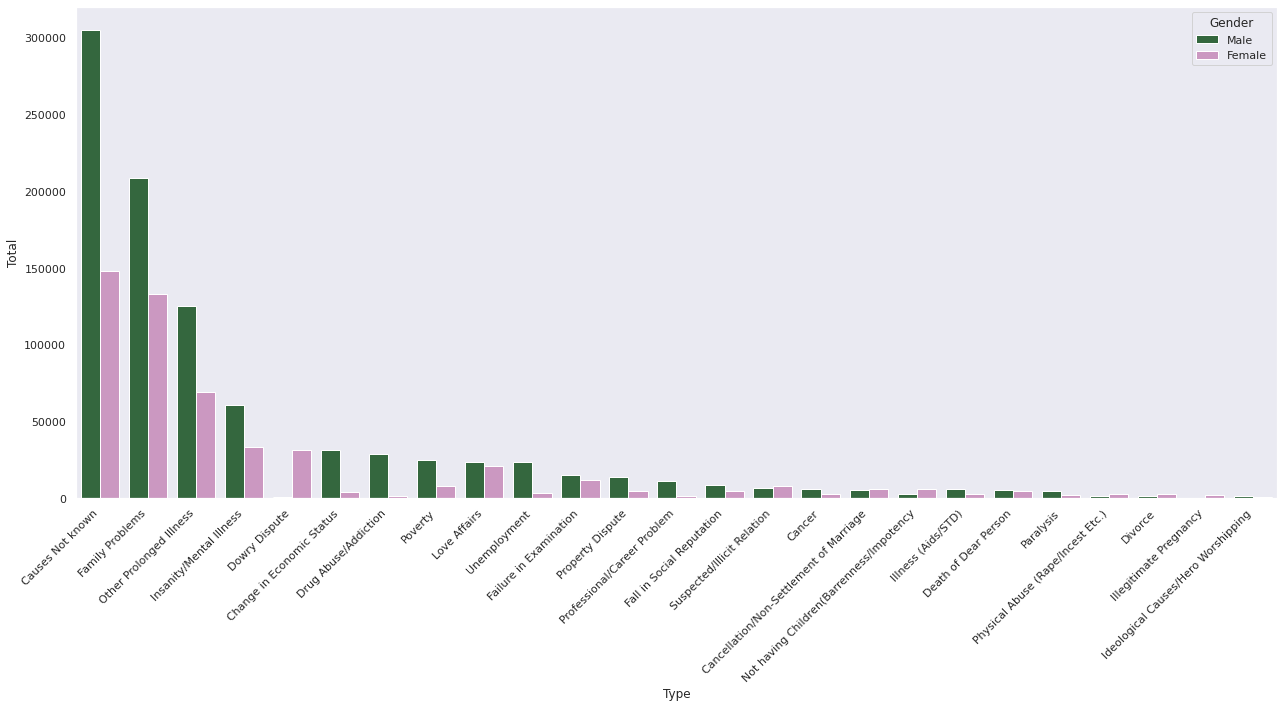

In [ ]:
plt.figure(figsize=(18,10))
causesDf = causesDf[['Type','Gender','Total']]
causes = causesDf.groupby(['Type','Gender'],as_index=False).sum()
causes.sort_values('Total',ascending=False,inplace=True)
sns.barplot(x='Type',y='Total',data=causes,hue='Gender',palette='cubehelix')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()



1.   From this graph, we can find out that the reason of suicide is not known in large number of cases
2.   Men seem to be badly affected by family problems, prolonged illness, mental illness, poverty, drug abuse, change in economic status, unemployment as compared to women.
3.   Women seem to be badly affected by dowry related suicide cases.



**Education status**

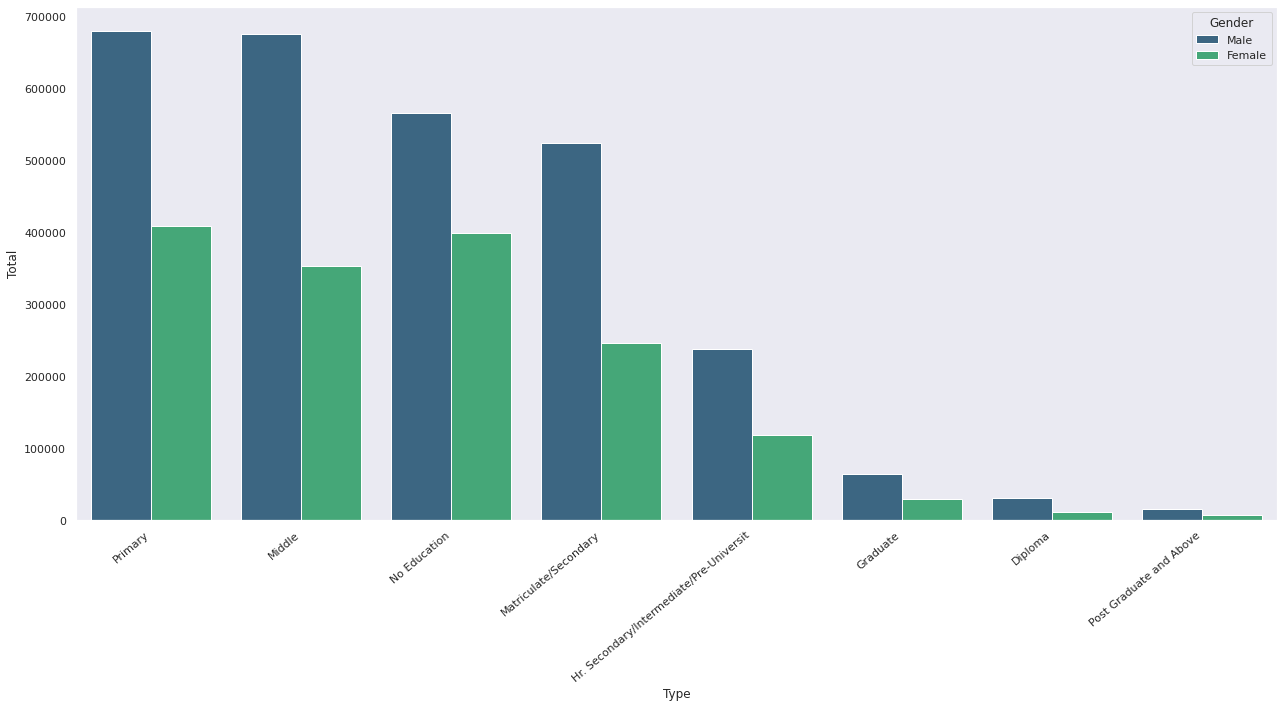

In [ ]:
plt.figure(figsize=(18,10))
eduDf = eduDf[["Type","Gender","Total"]]
education = eduDf.groupby(["Type","Gender"], as_index=False).sum()
education.sort_values("Total",ascending=False,inplace=True)
sns.barplot(x="Type",y="Total",hue="Gender",data=education,palette='viridis')
plt.xticks(rotation=40,ha='right')
plt.tight_layout()

This graph shows that the people with high suicide rates are less educated
 and mostly studied till matriculation

**Professional status**

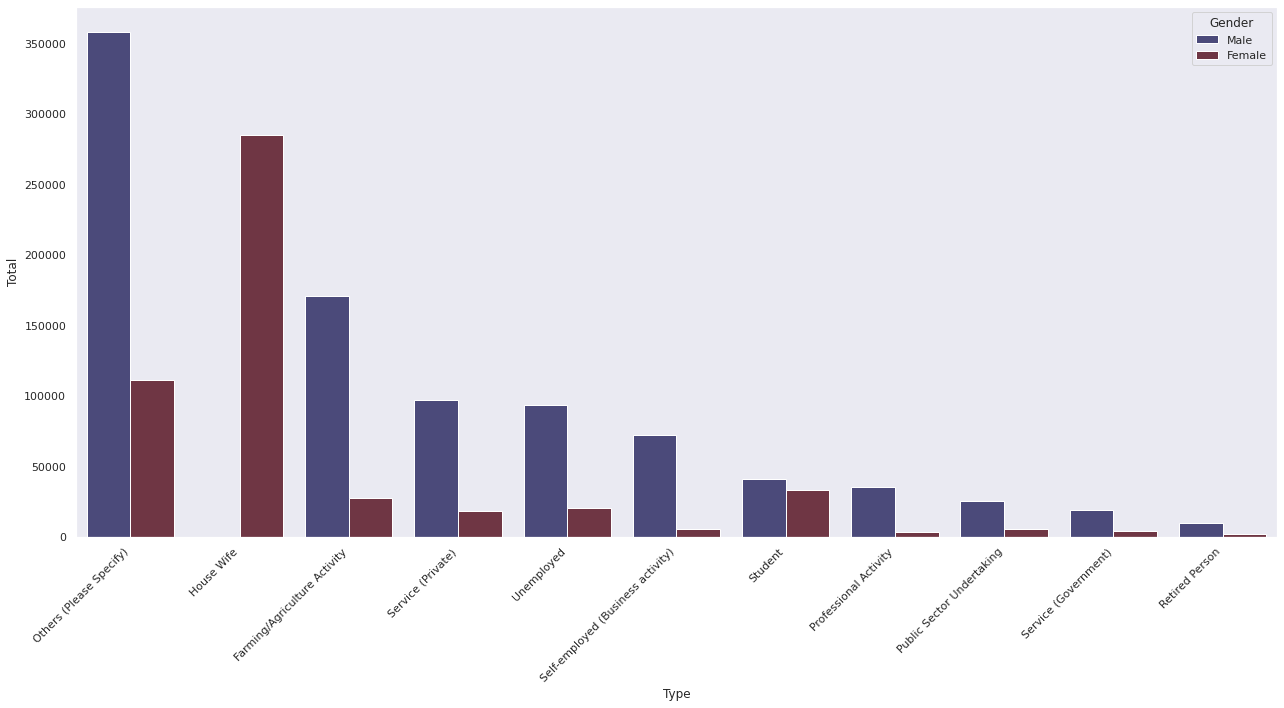

In [ ]:
plt.figure(figsize=(18,10))
profDf = profDf[['Type','Gender','Total']]
professional = profDf.groupby(['Type','Gender'],as_index=False).sum()
professional.sort_values('Total',ascending=False, inplace=True)
sns.barplot(x='Type',y='Total',hue='Gender',data=professional,palette='icefire')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()

This graph shows that the suicide rate of females who are emplolyed or we can say have any source of income is less as compare the to the females who are housewives and are not financially independent.

**Means Adopted**

In [ ]:
meansDf.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
276,A & N Islands,2001,Means_adopted,By Consuming Insecticides,Female,0-14,0
277,A & N Islands,2001,Means_adopted,By Hanging,Female,0-14,2
278,A & N Islands,2001,Means_adopted,By Jumping from (Other sites),Female,0-14,0
279,A & N Islands,2001,Means_adopted,By touching electric wires,Female,0-14,0
280,A & N Islands,2001,Means_adopted,By Machine,Female,0-14,0


In [ ]:
meansDf = meansDf[['Total','Type','Gender']]

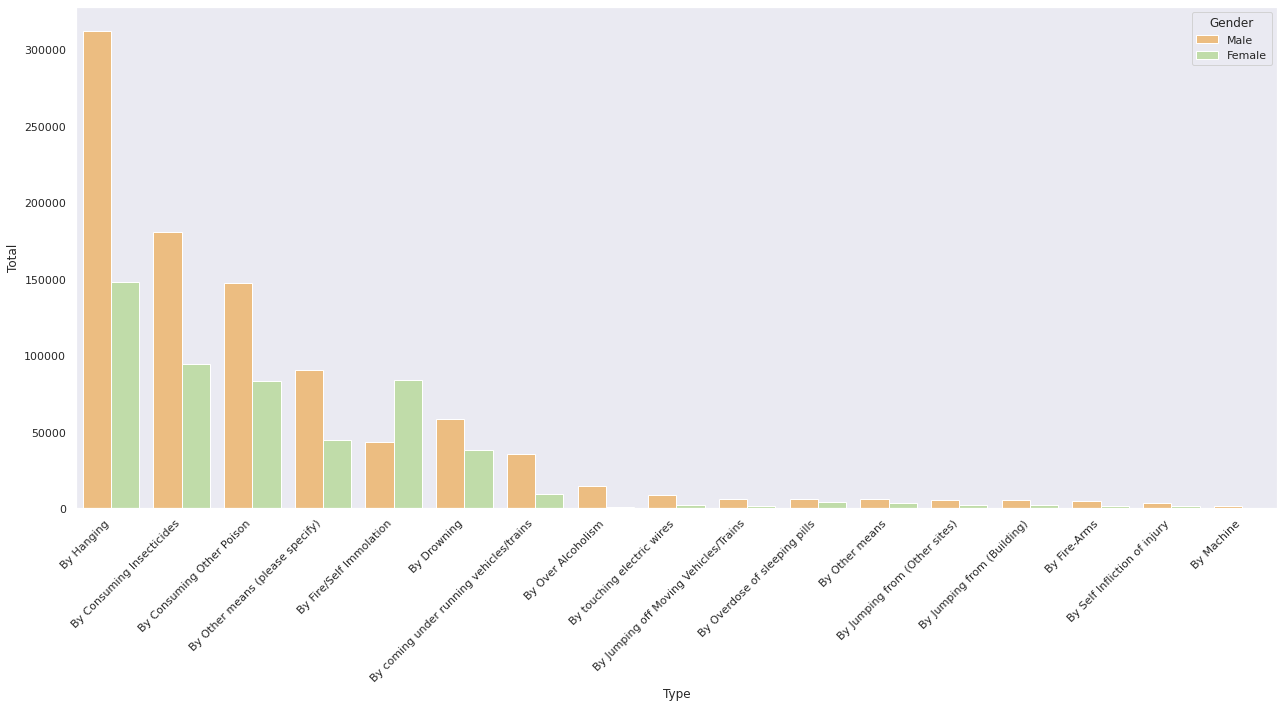

In [ ]:
plt.figure(figsize=(18,10))
means = meansDf.groupby(['Type','Gender'],as_index=False).sum()
means.sort_values('Total',ascending=False, inplace=True)
sns.barplot(x='Type',y='Total',hue='Gender',data=means,palette='Spectral')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()



1.   This graph shows that the major means of suicides are hanging,consuming insecticides and other poison.
2.   The suicide rate of male is more as compare to female.
3.   There must be strict rules and regulation regarding buying of such products like insecticides,poison etc. 

**Married Status**

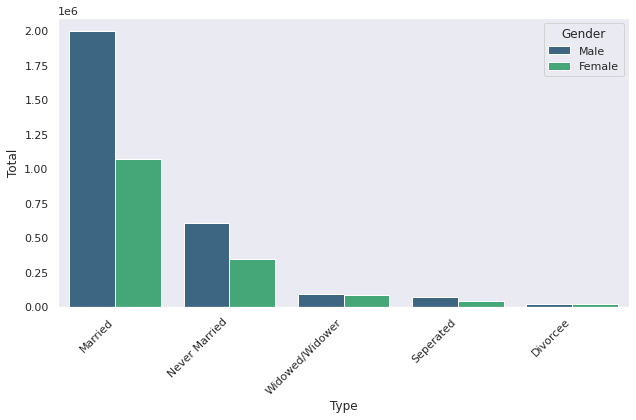

In [ ]:
plt.figure(figsize=(9,6))
socialDf = socialDf[['Type','Gender','Total']]
socialSort = socialDf.groupby(['Type','Gender'],as_index=False).sum().sort_values('Total',ascending=False)
sns.barplot(x='Type',y='Total',data=socialSort,hue='Gender',palette='viridis')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()

This graph shows that the number of suicides are more in case of married couples. We know that in India arrange marriage is a dominant system of marriage so there must be reforms in our social culture.

**Year-wise gender suicide cases**

In [ ]:
df.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


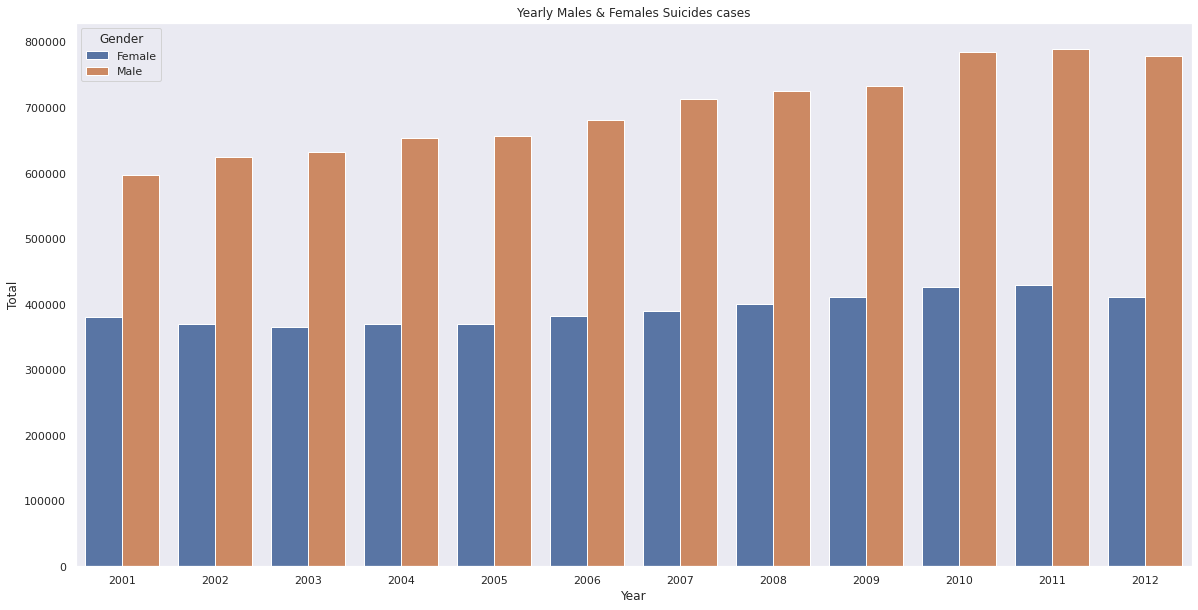

In [ ]:
gender_wise = df[['Year', 'Gender','Total']].groupby(['Year', 'Gender']).sum()
gender_wise.reset_index(inplace = True)
plt.rcParams.update({'font.size': 18})
plt.figure(figsize= (20,10)) # Make a plot size
plt.title('Yearly Males & Females Suicides cases')
ax = sns.barplot(x = 'Year', y = 'Total', hue = 'Gender', data = gender_wise)
plt.show()


This graph shows that the number of male committing suicide is more than females every year.

**Age-Group**

In [ ]:
causes.head()

,Type,Gender,Total
5,Causes Not known,Male,304985
21,Family Problems,Male,208771
4,Causes Not known,Female,148134
20,Family Problems,Female,133181
35,Other Prolonged Illness,Male,125493


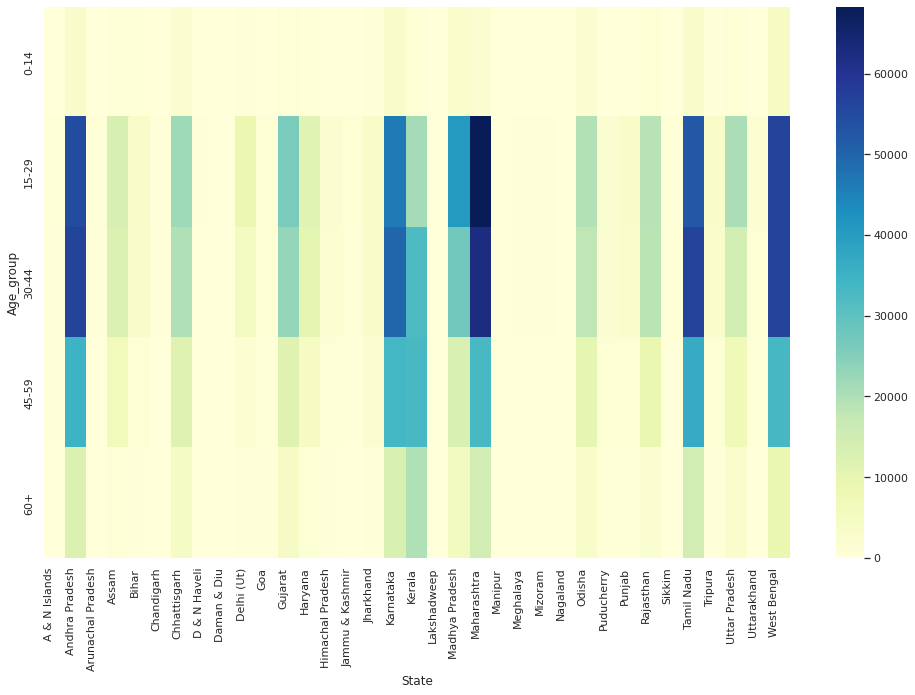

In [ ]:
causes = df[df['Type_code']=='Causes']
causesGrp = causes.groupby(['State','Age_group'],as_index=False).sum()
causesGrpPvt = causesGrp.pivot(index='Age_group',columns='State',values='Total')
plt.figure(figsize=(14,10))
plt.xticks(rotation=45,ha='right')
sns.heatmap(causesGrpPvt,cmap='YlGnBu')
plt.tight_layout()

This graph shows that the age groups 15-29 and 30-44 are most wonderable to suicide.

**Rate of change of suicides over the year**

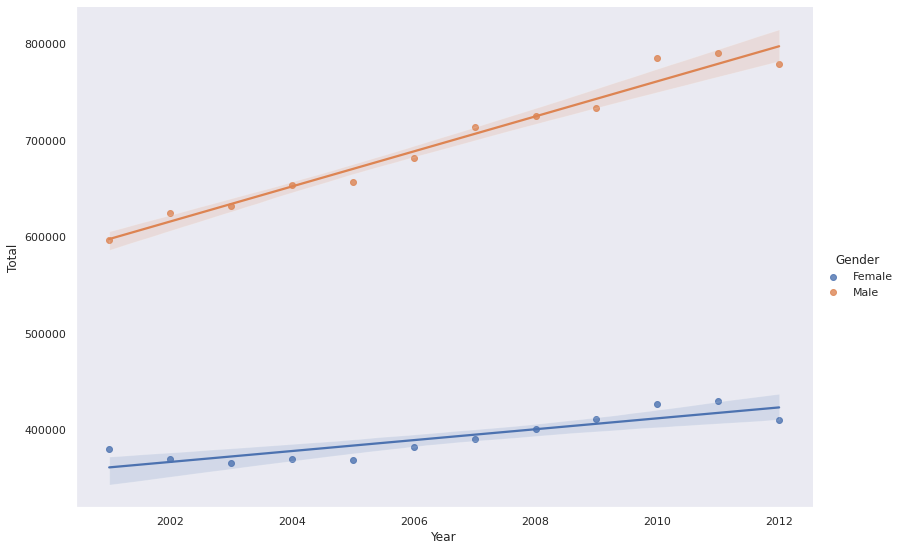

<Figure size 432x288 with 0 Axes>

In [ ]:
grp_year = df.groupby(["Year","Gender"])["Total"].sum()
grp_year = pd.DataFrame(grp_year).reset_index()
sns.lmplot(x="Year", y="Total", hue="Gender", data=grp_year,height=8, aspect=11.7/8)
plt.show()
plt.savefig("rt_gender_yrs.png")

The rate of suicides of both gender are growing steadily over the years.

**Gender-wise Percentage**

In [ ]:
gender=causesDf.groupby('Gender')['Total'].sum().to_frame()
gender.head()

,Total
Gender,
Female,517736
Male,923238


([<matplotlib.patches.Wedge at 0x7fdb5daf2ed0>,
 [Text(0.47055777230990614, 0.9942712823564496, 'Female'),
  Text(-0.470557679219508, -0.9942713264132436, 'Male')],
 [Text(0.2566678758054033, 0.5423297903762452, '36%'),
  Text(-0.2566678250288225, -0.5423298144072237, '64%')])

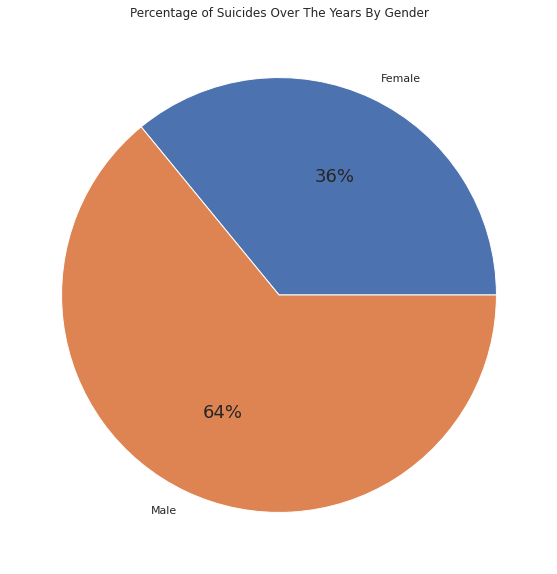

In [ ]:
plt.figure(figsize=(10,10))
plt.title("Percentage of Suicides Over The Years By Gender")
plt.pie(gender['Total'], labels=gender.index.to_list(), autopct='%.0f%%')

This graph shows that men are overall more affected by suicides as compared to females and therefore preventive measures should be taken to reduce it.